In [24]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
 
from sklearn import datasets 
from sklearn import manifold
from sklearn.datasets import fetch_openml


In [25]:
# Replace 'mnist.csv' with the actual path to your CSV file
mnist_df = pd.read_csv('mnist_784.csv')


In [27]:
pixel_values = mnist_df.drop(columns=['class'])  # Features (pixel values)
targets  = mnist_df['class']  # Labels (digit values)


In [28]:
targets = targets.astype(int) 

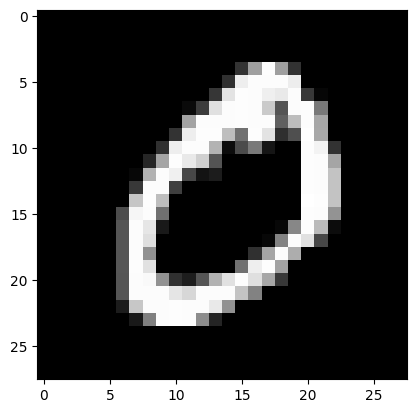

In [38]:
single_image = pixel_values.iloc[1].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [40]:
tsne = manifold.TSNE(n_components=2, random_state=42) 

pixel_values_array = pixel_values.to_numpy()

transformed_data = tsne.fit_transform(pixel_values_array[:3000, :])


c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [41]:
tsne_df = pd.DataFrame( 
    np.column_stack((transformed_data, targets[:3000])),  
    columns=["x", "y", "targets"] 
) 
 
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [44]:
tsne_df.head(10)

,x,y,targets
0,23.203314,-17.619217,5
1,7.989185,-67.105774,0
2,50.110378,39.364567,4
3,-37.374588,31.809721,1
4,23.049948,33.583393,9
5,-19.747002,4.665139,2
6,-59.887478,-8.998437,1
7,37.657616,-27.392725,3
8,-54.670567,-5.580581,1
9,2.958270,31.583323,4


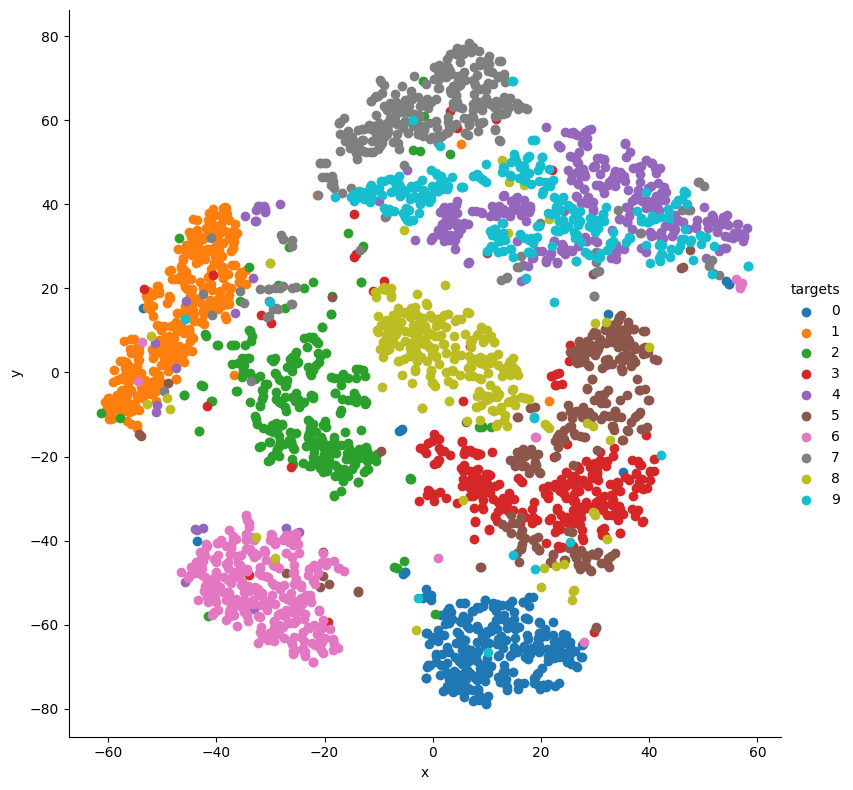

In [46]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
 
grid.map(plt.scatter, "x", "y").add_legend() 

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()


## Cross-validation

In [75]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
df = pd.read_csv("winequality-red.csv")
quality_mapping = {
    3: 0, 
    4: 1, 
    5: 2, 
    6: 3, 
    7: 4, 
    8: 5
      }

df.loc[:,'quality']=df.quality.map(quality_mapping)
df = df.sample(frac=1).reset_index(drop=True)

In [77]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.8,0.660,0.39,3.2,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,4
1,5.3,0.715,0.19,1.5,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,2
2,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6,1
3,8.6,0.630,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3,2
4,7.6,0.490,0.33,1.9,0.074,27.0,85.0,0.99706,3.41,0.58,9.0,2


In [ ]:
import sklearn,sklearn.datasets

bosten  = sklearn.datasets.load_boston()
boston_df = pd.DataFrame(data=bosten.data, columns=bosten.feature_names)
boston_df['target'] = bosten.target
boston_df.head()
boston_df = boston_df.sample(frac=1).reset_index(drop=True)
boston_df.head()

In [78]:
df_train = df.head(1000)
df_test = df.tail(599)

In [79]:
from sklearn import tree 
from sklearn import metrics
import numpy as np


cols = df.columns.tolist()
cols.remove('quality')


clf = sklearn.tree.DecisionTreeClassifier(max_depth=7)

clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [80]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score( 
    df_train.quality, train_predictions 
)
test_accuracy = metrics.accuracy_score( 
    df_test.quality, test_predictions 
)
print(train_accuracy)
print(test_accuracy)

0.757
0.5843071786310517


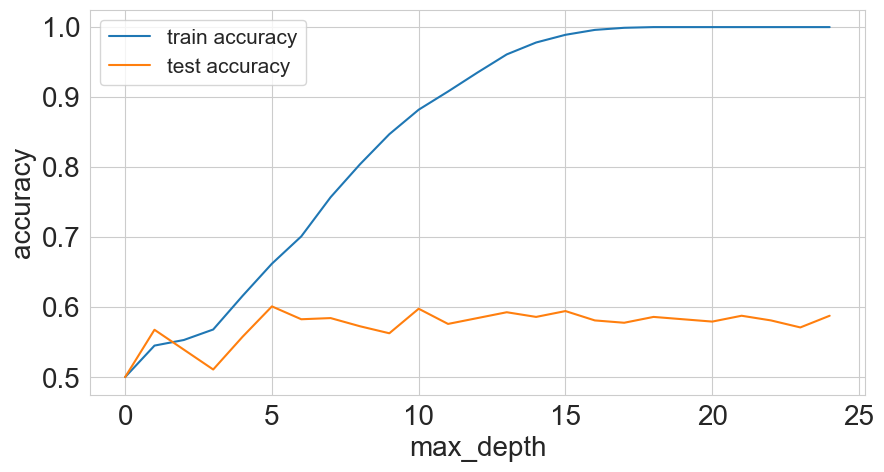

In [82]:
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


matplotlib.rc('xtick',labelsize = 20)
matplotlib.rc('ytick',labelsize = 20)

train_accuracies=[0.5]
test_accuracies=[0.5]

for depth in range(1, 25):
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols],df_train.quality) 

    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    train_accuracy = metrics.accuracy_score( 
    df_train.quality, train_predictions 
      )
    test_accuracy = metrics.accuracy_score( 
    df_test.quality, test_predictions )

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20) 
plt.show()



## k-fold cross-validation in classification

In [105]:
from sklearn import model_selection

df = pd.read_csv("winequality-red.csv")

df['kfold'] = -1
df=df.sample(frac=1).reset_index(drop=True)
kf=model_selection.KFold(n_splits=5)

for fold,(trn_,val_) in enumerate(kf.split(X=df)):
    df.loc[val_,'kfold'] = fold

#df=df.sample(frac=1).reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,6.6,0.440,0.15,2.10,0.076,22.0,53.0,0.99570,3.32,0.62,9.30,5,0
1,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.90,5,0
2,8.4,0.560,0.04,2.00,0.082,10.0,22.0,0.99760,3.22,0.44,9.60,5,0
3,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8,0
4,7.9,0.290,0.49,2.20,0.096,21.0,59.0,0.99714,3.31,0.67,10.10,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.0,0.560,0.17,1.70,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,4
1595,8.3,0.260,0.37,1.40,0.076,8.0,23.0,0.99740,3.26,0.70,9.60,6,4
1596,7.4,0.610,0.01,2.00,0.074,13.0,38.0,0.99748,3.48,0.65,9.80,5,4
1597,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7,4


## stratified k-fold in classification

 If  you  have  a skewed dataset for binary classification with 90% positive samples and only 10% negative  samples

In [106]:
from sklearn import model_selection


df = pd.read_csv("winequality-red.csv")

df['kfold'] = -1

df=df.sample(frac=1).reset_index(drop=True)

y = df.quality.values

kf=model_selection.StratifiedKFold(n_splits=5)

for fold,(trn_,val_) in enumerate(kf.split(X=df,y=y)):

    df.loc[val_,'kfold'] = fold

#df=df.sample(frac=1).reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.2,0.20,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.4,6,0
1,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,0
2,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,0
3,8.0,0.58,0.28,3.2,0.066,21.0,114.0,0.99730,3.22,0.54,9.4,6,0
4,6.6,0.50,0.01,1.5,0.060,17.0,26.0,0.99520,3.40,0.58,9.8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.1,0.43,0.17,1.8,0.082,27.0,51.0,0.99634,3.49,0.64,10.4,5,4
1595,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,6,4
1596,6.9,0.49,0.19,1.7,0.079,13.0,26.0,0.99547,3.38,0.64,9.8,6,4
1597,7.0,0.42,0.19,2.3,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,5,4


Text(0, 0.5, 'count')

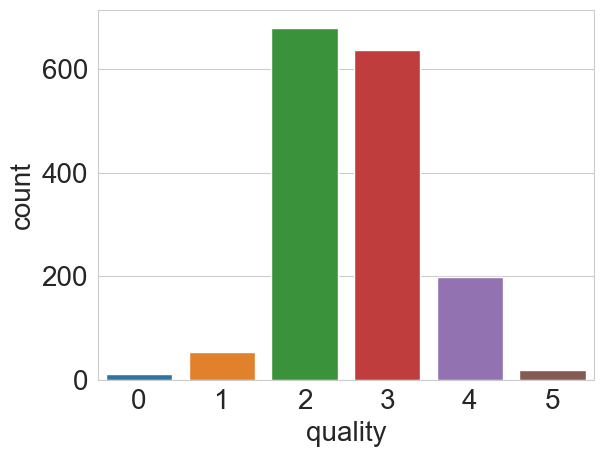

In [108]:
df = pd.read_csv("winequality-red.csv")
quality_mapping = {
    3: 0, 
    4: 1, 
    5: 2, 
    6: 3, 
    7: 4, 
    8: 5
      }

df.loc[:,'quality']=df.quality.map(quality_mapping)
df = df.sample(frac=1).reset_index(drop=True)


b = sns.countplot(x='quality', data=df) 
b.set_xlabel("quality", fontsize=20) 
b.set_ylabel("count", fontsize=20)

##  stratified k-fold in regression

In [140]:
# stratified-kfold for regression 
import numpy as np 
import pandas as pd 
 
from sklearn import datasets 
from sklearn import model_selection


def create_folds(data):
    
    data['kfold'] = -1

    data = data.sample(frac=1).reset_index(drop=True)
# calculate the number of bins by Sturge's rule 
    # I take the floor of the value, you can also 
    # just round it 
    num_bins = int(np.floor(1 + np.log2(len(data))))
   # num_bins = int(np.floor(1 + np.log2(len(data)))

    data.loc[:,'bins'] = pd.cut(
        data['quality'], bins=num_bins, labels=False
    )
    
    kf=model_selection.StratifiedKFold(n_splits=5)

    for f,(t_,v_) in enumerate(kf.split(X=data,y=data.bins.values)):
        data.loc[v_,'kfold'] = f

    data = data.drop('bins',axis=1)
    return data


X, y = datasets.make_regression( 
        n_samples=15000, n_features=100, n_targets=1 
    )

#     # create a dataframe out of our numpy arrays 
# df = pd.DataFrame( 
#         X, 
#         columns=[f"f_{i}" for i in range(X.shape[1])] 
#     )
# df.loc[:, "target"] = y


In [153]:
df = pd.read_csv("winequality-red.csv")
quality_mapping = {
    3: 0, 
    4: 1, 
    5: 2, 
    6: 3, 
    7: 4, 
    8: 5
      }

df.loc[:,'quality']=df.quality.map(quality_mapping)
df = df.sample(frac=1).reset_index(drop=True)

df = create_folds(df)

In [154]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0
1,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.9964,3.53,0.49,10.9,2,0
2,6.4,0.53,0.09,3.9,0.123,14.0,31.0,0.9968,3.50,0.67,11.0,1,0
3,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.9985,3.43,0.62,10.7,3,0
4,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,5,0


Text(0, 0.5, 'count')

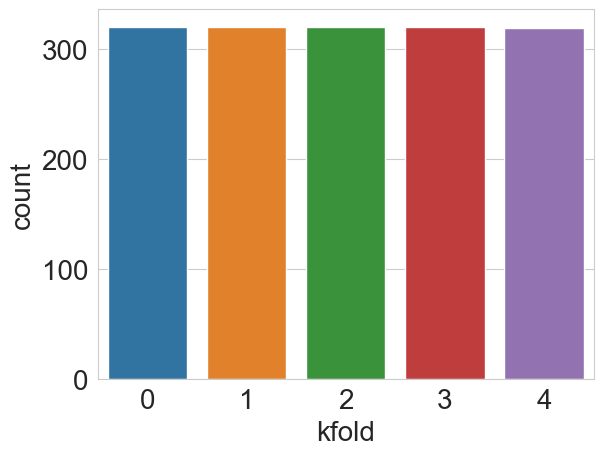

In [155]:
b = sns.countplot(x='kfold', data=df) 
b.set_xlabel("kfold", fontsize=20) 
b.set_ylabel("count", fontsize=20)

In [157]:
target_column = 'kfold'
date_with_value_0 = df[df[target_column] == 3]
date_with_value_0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
721,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0,3
762,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0,3
865,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,4,3
872,9.1,0.21,0.37,1.6,0.067,6.0,10.0,0.99552,3.23,0.58,11.1,4,3
876,8.7,0.33,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,1,3
1312,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,3,3
1314,10.2,0.23,0.37,2.2,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,1,3
1315,8.2,0.59,0.00,2.5,0.093,19.0,58.0,1.00020,3.50,0.65,9.3,3,3


## Evaluation metrics

In [158]:
def accuracy(y_true, y_pred): 
    """ 
    Function to calculate accuracy 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: accuracy score 
    """ 
    # initialize a simple counter for correct predictions 
    correct_counter = 0 
    # loop over all elements of y_true 
    # and y_pred "together" 
    for yt, yp in zip(y_true, y_pred): 
        if yt == yp: 
            # if prediction is equal to truth, increase the counter 
            correct_counter += 1 
 
    # return accuracy 
    # which is correct predictions over the number of samples 
    return correct_counter / len(y_true)

In [160]:
from sklearn import metrics 
l1 = [0,1,1,1,0,0,0,1] 
l2 = [0,1,1,1,0,1,0,0] 
metrics.accuracy_score(l1, l2)

0.75

## Confusion matrix

Text(0.5, 57.249999999999986, 'Predicted Labels')

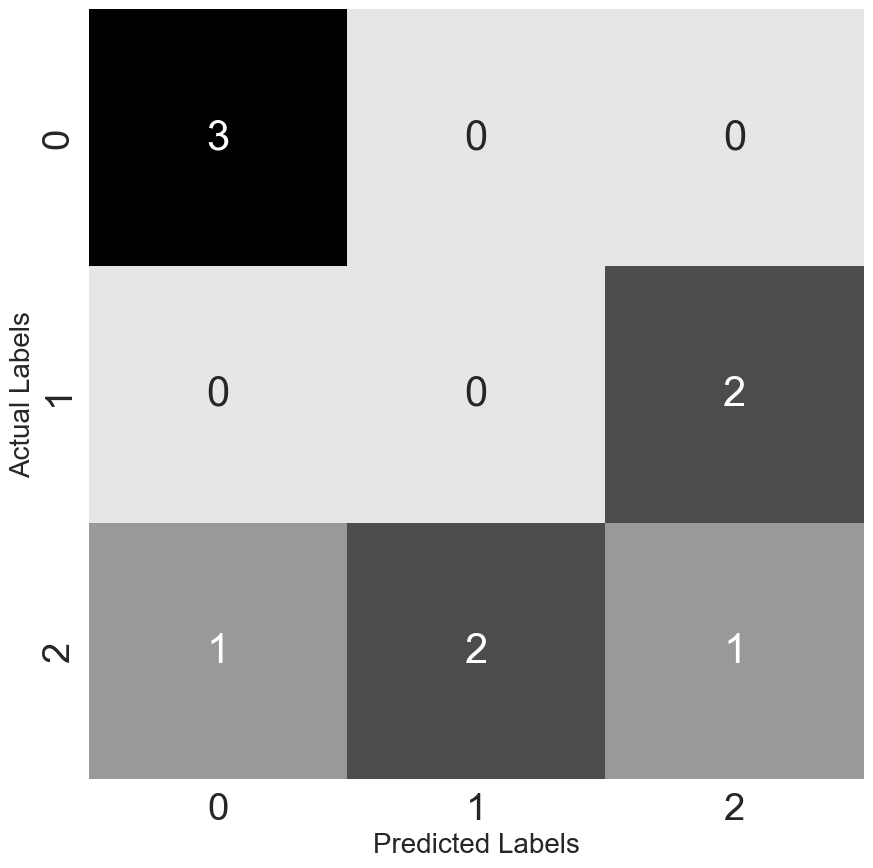

In [167]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics 
 
# some targets 
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2] 
 
#some predictions 
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2] 
 
# get confusion matrix from sklearn 
cm = metrics.confusion_matrix(y_true, y_pred) 
 
# plot using matplotlib and seaborn 
plt.figure(figsize=(10, 10)) 
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, 
as_cmap=True) 
sns.set(font_scale=2.5) 
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20) 
plt.xlabel('Predicted Labels', fontsize=20)

## regression metrics

## mean absolute error (MAE)

In [168]:
import numpy as np 
 
 
def mean_absolute_error(y_true, y_pred): 
    """ 
    This function calculates mae 
    :param y_true: list of real numbers, true values 
    :param y_pred: list of real numbers, predicted values 
    :return: mean absolute error 
    """ 
    # initialize error at 0 
    error = 0 
    # loop over all samples in the true and predicted list 
    for yt, yp in zip(y_true, y_pred): 
        # calculate absolute error  
        # and add to error 
        error += np.abs(yt - yp) 
    # return mean error 
    return error / len(y_true)

## mean squared error (MSE)

In [169]:
def mean_squared_error(y_true, y_pred): 
    """ 
    This function calculates mse 
    :param y_true: list of real numbers, true values 
    :param y_pred: list of real numbers, predicted values 
    :return: mean squared error 
    """ 
    # initialize error at 0 
    error = 0 
    # loop over all samples in the true and predicted list 
    for yt, yp in zip(y_true, y_pred): 
        # calculate squared error  
        # and add to error 
        error += (yt - yp) ** 2 
    # return mean error 
    return error / len(y_true)

## RMSE (root mean squared error)

In [ ]:
import numpy as np 
 
 
def mean_squared_log_error(y_true, y_pred): 
    """ 
    This function calculates msle 
    :param y_true: list of real numbers, true values 
    :param y_pred: list of real numbers, predicted values 
    :return: mean squared logarithmic error 
""" 
    # initialize error at 0 
    error = 0 
    # loop over all samples in true and predicted list 
    for yt, yp in zip(y_true, y_pred): 
        # calculate squared log error  
        # and add to error 
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2 
    # return mean error 
    return error / len(y_true)

##  R2 (R-squared)

In [172]:
import numpy as np 
 
 
def r2(y_true, y_pred): 
    """ 
    This function calculates r-squared score 
    :param y_true: list of real numbers, true values re
    :param y_pred: list of real numbers, predicted values 
    :return: r2 score 
    """ 
     
    # calculate the mean value of true values 
    mean_true_value = np.mean(y_true) 
     
    # initialize numerator with 0 
    numerator = 0 
    # initialize denominator with 0 
    denominator = 0 
     
    # loop over all true and predicted values 
    for yt, yp in zip(y_true, y_pred): 
        # update numerator 
        numerator += (yt - yp) ** 2 
        # update denominator 
        denominator += (yt - mean_true_value) ** 2 
    # calculate the ratio 
    ratio = numerator / denominator 
    # return 1 - ratio 
    return 1 - ratio
  

## Feature engineering

In [37]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'date': pd.to_datetime(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']),
    'customer_id': [126501, 100332, 103223, 103424, 122205],

    'cat1': [1, 2, 1, 3, 2],
    'cat2': [4, 5, 4, 6, 5],
    'cat3': [7, 8, 8, 7, 8],
    'num1': [10, 20, 15, 25, 18],
}

# Create the DataFrame
df = pd.DataFrame(data)



In [33]:
df

,date,customer_id,cat1,cat2,cat3,num1,year,weekofyear,month,dayofweek,weekend
0,2022-01-01,126501,1,4,7,10,2022,52,1,5,1
1,2022-02-01,100332,2,5,8,20,2022,5,2,1,1
2,2022-03-01,103223,1,4,8,15,2022,9,3,1,1
3,2022-04-01,103424,3,6,7,25,2022,13,4,4,1
4,2022-05-01,122205,2,5,8,18,2022,17,5,6,1


In [38]:
 # create an aggregate dictionary 
aggs = {} 
aggs['month'] = ['nunique', 'mean']
aggs['weekofyear'] = ['nunique', 'mean'] 
    # we aggregate by num1 and calculate sum, max, min  
    # and mean values of this column 
aggs['num1'] = ['sum','max','min','mean'] 
    # for customer_id, we calculate the total count 
aggs['customer_id'] = ['size'] 
    # again for customer_id, we calculate the total unique 
aggs['customer_id'] = ['nunique'] 

aggs

{'month': ['nunique', 'mean'],
 'weekofyear': ['nunique', 'mean'],
 'num1': ['sum', 'max', 'min', 'mean'],
 'customer_id': ['nunique']}

In [ ]:
agg_df = df.groupby('customer_id').agg(aggs)
agg_df = agg_df.reset_index()

In [39]:
def generate_features(df): 
    # create a bunch of features using the date column 
    df.loc[:, 'year'] = df['date'].dt.year 
    df.loc[:, 'weekofyear'] = df['date'].dt.isocalendar().week
    df.loc[:, 'month'] = df['date'].dt.month 
    df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek 
    df.loc[:, 'weekend'] = (df['date'].dt.isocalendar().week.values >=5).astype(int) 
     
    # create an aggregate dictionary 
    aggs = {} 
    # for aggregation by month, we calculate the 
    # number of unique month values and also the mean 
    aggs['month'] = ['nunique', 'mean'] 
    aggs['weekofyear'] = ['nunique', 'mean'] 
    # we aggregate by num1 and calculate sum, max, min  
    # and mean values of this column 
    aggs['num1'] = ['sum','max','min','mean'] 
    # for customer_id, we calculate the total count 
    aggs['customer_id'] = ['size'] 
    # again for customer_id, we calculate the total unique 
   # aggs['customer_id'] = ['nunique'] 
     
    # we group by customer_id and calculate the aggregates 
    agg_df = df.groupby('customer_id').agg(aggs) 
    agg_df = agg_df.reset_index() 
    return agg_df 

In [40]:
generate_features(df)

customer_id   month      weekofyear       num1               customer_id
              nunique mean    nunique  mean  sum max min  mean        size
0      100332       1  2.0          1   5.0   20  20  20  20.0           1
1      103223       1  3.0          1   9.0   15  15  15  15.0           1
2      103424       1  4.0          1  13.0   25  25  25  25.0           1
3      122205       1  5.0          1  17.0   18  18  18  18.0           1
4      126501       1  1.0          1  52.0   10  10  10  10.0           1

In [43]:
import numpy as np 
 
# generate a random dataframe with  
# 2 columns and 100 rows 
df = pd.DataFrame( 
    np.random.rand(100, 2), 
    columns=[f"f_{i}" for i in range(1, 3)] 
) 
df

,f_1,f_2
0,0.610600,0.808978
1,0.664210,0.584265
2,0.183433,0.062330
3,0.611857,0.726359
4,0.540077,0.426584
...,...,...
95,0.320651,0.056824
96,0.574227,0.973223
97,0.983668,0.249941
98,0.295536,0.749180


In [44]:
from sklearn import preprocessing
pf = preprocessing.PolynomialFeatures( 
    degree=2, 
    interaction_only=False, 
    include_bias=False 
) 
# fit to the features 
pf.fit(df) 
# create polynomial features 
poly_feats = pf.transform(df)


In [52]:
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame( 
    poly_feats, 
    columns=[f"f_{i}" for i in range(1, num_feats + 1)] 
)

In [53]:
df_transformed

,f_1,f_2,f_3,f_4,f_5
0,0.610600,0.808978,0.372833,0.493962,0.654445
1,0.664210,0.584265,0.441174,0.388074,0.341365
2,0.183433,0.062330,0.033648,0.011433,0.003885
3,0.611857,0.726359,0.374369,0.444428,0.527598
4,0.540077,0.426584,0.291683,0.230388,0.181974
...,...,...,...,...,...
95,0.320651,0.056824,0.102817,0.018221,0.003229
96,0.574227,0.973223,0.329737,0.558851,0.947162
97,0.983668,0.249941,0.967602,0.245859,0.062471
98,0.295536,0.749180,0.087342,0.221410,0.561271


In [58]:
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)
df

,f_1,f_2,f_bin_10,f_bin_100
0,0.610600,0.808978,6,61
1,0.664210,0.584265,6,66
2,0.183433,0.062330,1,17
3,0.611857,0.726359,6,61
4,0.540077,0.426584,5,53
...,...,...,...,...
95,0.320651,0.056824,3,31
96,0.574227,0.973223,5,57
97,0.983668,0.249941,9,99
98,0.295536,0.749180,2,28


In [67]:
import numpy as np 
from sklearn import impute 
 
# create a random numpy array with 10 samples 
# and 6 features and values ranging from 1 to 15 
X = np.random.randint(1, 15, (10, 6))
# convert the array to float 
X = X.astype(float)
# randomly assign 10 elements to NaN (missing) 
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan
knn_imputer = impute.KNNImputer(n_neighbors=2)

In [68]:
knn_imputer.fit_transform(X)

array([[ 3.5,  2. , 10. ,  8. ,  2. ,  5. ],
       [ 9. ,  5.5,  1. ,  5. ,  3. , 14. ],
       [ 6. ,  1.5,  6. ,  8.5,  1. ,  4. ],
       [13. , 14. , 12. ,  1. ,  9. ,  6. ],
       [ 9. ,  1. , 10. ,  7.5,  3. , 13. ],
       [ 5. , 10. ,  4. , 11. ,  6. , 13. ],
       [ 6. ,  8. , 10. ,  2. , 12. ,  9.5],
       [ 1. ,  5.5,  5. ,  9. ,  4. ,  9. ],
       [ 5. ,  1. ,  6. ,  6. ,  9. ,  9. ],
       [ 7.5,  6. , 11. ,  7. ,  8. , 13. ]])

## Feature selection

In [72]:
from sklearn.feature_selection import VarianceThreshold
data = np.random.randint(1, 15, (10, 6))
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(data)

In [74]:
import pandas as pd 
from sklearn.datasets import fetch_california_housing 
 
# fetch a regression dataset 
data = fetch_california_housing() 
X = data["data"] 
col_names = data["feature_names"] 
y = data["target"]
df = pd.DataFrame(X, columns=col_names) 
# introduce a highly correlated column 
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt) 
 
# get correlation matrix (pearson) 
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


## Wrapper for univariate feature selectio

In [75]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import f_classif 
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import mutual_info_classif 
from sklearn.feature_selection import mutual_info_regression 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import SelectPercentile 


class UnivariateFeatureSelction: 
    def __init__(self, n_features, problem_type, scoring): 
        """ 
        Custom univariate feature selection wrapper on 
        different univariate feature selection models from 
        scikit-learn. 
        :param n_features: SelectPercentile if float else SelectKBest 
        :param problem_type: classification or regression 
        :param scoring: scoring function, string 
        """ 
        # for a given problem type, there are only 
        # a few valid scoring methods 
        # you can extend this with your own custom 
        # methods if you wish 
        if problem_type == "classification": 
            valid_scoring = { 
                "f_classif": f_classif, 
                "chi2": chi2, 
                "mutual_info_classif": mutual_info_classif 
            } 
        else: 
            valid_scoring = { 
                "f_regression": f_regression, 
                "mutual_info_regression": mutual_info_regression 
            } 
         
        # raise exception if we do not have a valid scoring method 
        if scoring not in valid_scoring: 
            raise Exception("Invalid scoring function") 
         
        # if n_features is int, we use selectkbest 
        # if n_features is float, we use selectpercentile 
        # please note that it is int in both cases in sklearn 
        if isinstance(n_features, int): 
            self.selection = SelectKBest( 
                valid_scoring[scoring], 
                k=n_features 
                ) 
        elif isinstance(n_features, float): 
            self.selection = SelectPercentile( 
                valid_scoring[scoring], 
                percentile=int(n_features * 100) 
            ) 
        else: 
            raise Exception("Invalid type of feature")

# same fit function 
    def fit(self, X, y): 
        return self.selection.fit(X, y) 


# same transform function 
    def transform(self, X): 
        return self.selection.transform(X) 
     
    # same fit_transform function 
    def fit_transform(self, X, y): 
        return self.selection.fit_transform(X, y)


In [ ]:
ufs = UnivariateFeatureSelction( 
    n_features=0.1,  
    problem_type="regression",  
    scoring="f_regression" 
) 
ufs.fit(X, y) 
X_transformed = ufs.transform(X)

## greedy feature selection

In [76]:
# greedy.py 
import pandas as pd 
 
from sklearn import linear_model 
from sklearn import metrics 
from sklearn.datasets import make_classification 


class GreedyFeatureSelection:     
    """ 
    A simple and custom class for greedy feature selection. 
    You will need to modify it quite a bit to make it suitable 
    for your dataset. 
    """ 
    def evaluate_score(self, X, y): 
        """ 
        This function evaluates model on data and returns 
        Area Under ROC Curve (AUC) 
        NOTE: We fit the data and calculate AUC on same data. 
        WE ARE OVERFITTING HERE.  
        But this is also a way to achieve greedy selection. 
        k-fold will take k times longer. 
 
        If you want to implement it in really correct way, 
        calculate OOF AUC and return mean AUC over k folds. 
        This requires only a few lines of change and has been  
        shown a few times in this book. 
 
        :param X: training data 
        :param y: targets 
        :return: overfitted area under the roc curve 
        """ 
        # fit the logistic regression model, 
        # and calculate AUC on same data 
        # again: BEWARE 
        # you can choose any model that suits your data 
        model = linear_model.LogisticRegression() 
        model.fit(X, y) 
        predictions = model.predict_proba(X)[:, 1] 
        auc = metrics.roc_auc_score(y, predictions) 
        return auc
    
    def _feature_selection(self, X, y): 
        """ 
        This function does the actual greedy selection 
        :param X: data, numpy array 
        :param y: targets, numpy array 
        :return: (best scores, best features) 
        """ 
        # initialize good features list  
        # and best scores to keep track of both 
        good_features = [] 
        best_scores = [] 
         
        # calculate the number of features 
        num_features = X.shape[1] 
         
        # infinite loop 
        while True: 
            # initialize best feature and score of this loop 
            this_feature = None 
            best_score = 0 
 
            # loop over all features 
            for feature in range(num_features): 
                # if feature is already in good features, 
                # skip this for loop 
                if feature in good_features: 
                    continue 
                # selected features are all good features till now 
                # and current feature 
                selected_features = good_features + [feature] 
                # remove all other features from data 
                xtrain = X[:, selected_features] 
                # calculate the score, in our case, AUC 
                score = self.evaluate_score(xtrain, y) 
                # if score is greater than the best score 
                # of this loop, change best score and best feature 
                if score > best_score: 
                    this_feature = feature 
                    best_score = score 
 
            # if we have selected a feature, add it
            # to the good feature list and update best scores list 
            if this_feature != None: 
                good_features.append(this_feature) 
                best_scores.append(best_score) 
 
            # if we didnt improve during the last two rounds, 
            # exit the while loop 
            if len(best_scores) > 2: 
                if best_scores[-1] < best_scores[-2]: 
                    break 
        # return best scores and good features 
        # why do we remove the last data point? 
        return best_scores[:-1], good_features[:-1]
    
    
    def __call__(self, X, y): 
        """ 
        Call function will call the class on a set of arguments 
        """ 
        # select features, return scores and selected indices 
        scores, features = self._feature_selection(X, y) 
        # transform data with selected features 
        return X[:, features], scores 

In [86]:
if __name__ == "__main__": 
    # generate binary classification data 
    X, y = make_classification(n_samples=1000, n_features=100) 
 
    # transform data by greedy feature selection 
    X_transformed, scores = GreedyFeatureSelection()(X, y)
print(X_transformed[0])
print(scores[0])

[-2.47110315 -1.15021006  0.21383722  0.00635393 -0.48600727 -0.86381688
  0.90993019 -0.35844869 -0.14489053 -0.13490888  0.7417667   0.49287995
  0.51798207  0.17111148  0.1343443  -0.97190181  2.20740534  0.86689725
 -1.00144461 -0.5898246  -0.17549562 -2.08950313  1.62914577 -0.31807232
  0.09473432 -1.97667352 -1.76293513  0.64331823  0.51684259 -0.53346224
  1.03884519  0.26241543  2.56679973 -0.03071585  0.12996273 -0.30527693
 -0.83909967 -0.5943064  -0.98793345  0.16126574  1.40794924  0.35683469
  0.58291387  0.04137568 -0.44072064  0.60774266  0.03465771 -0.2009834
 -0.81878123]
0.9680078720314881


## recursive feature elimination (RFE)

In [91]:
import pandas as pd 
 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import fetch_california_housing 
 
# fetch a regression dataset 
data = fetch_california_housing() 
X = data["data"] 
col_names = data["feature_names"] 
y = data["target"]



In [92]:
# initialize the model 
model = LinearRegression() 
# initialize RFE 
rfe = RFE( 
    estimator=model, 
    n_features_to_select=3 
) 
 
# fit RFE 
rfe.fit(X, y) 
 
# get the transformed data with 
# selected columns 
X_transformed = rfe.transform(X)

In [94]:
X_transformed.shape

(20640, 3)

##  the importance of features.

In [97]:
import pandas as pd 
from sklearn.datasets import load_diabetes 
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt 

# fetch a regression dataset 
# in diabetes data we predict diabetes progression 
# after one year based on some features 
data = load_diabetes() 
X = data["data"] 
col_names = data["feature_names"] 
y = data["target"] 
 
# initialize the model 
model = RandomForestRegressor() 
 
# fit the model 
model.fit(X, y)

RandomForestRegressor()

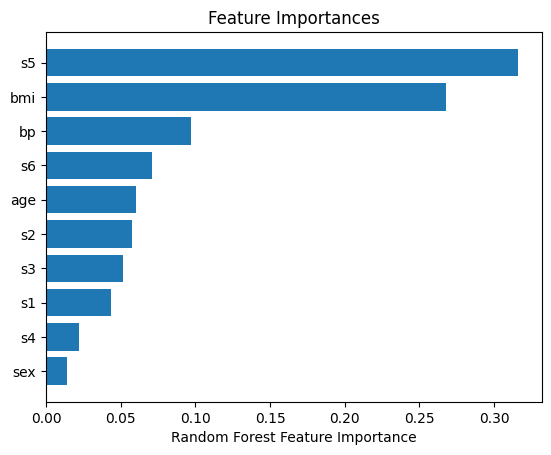

In [98]:
importances = model.feature_importances_ 
idxs = np.argsort(importances) 
plt.title('Feature Importances') 
plt.barh(range(len(idxs)), importances[idxs], align='center') 
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs]) 
plt.xlabel('Random Forest Feature Importance') 
plt.show()

## SelectFromModel

In [99]:
import pandas as pd 
from sklearn.datasets import load_diabetes 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel 
 
# fetch a regression dataset 
# in diabetes data we predict diabetes progression 
# after one year based on some features 
data = load_diabetes() 
X = data["data"] 
col_names = data["feature_names"] 
y = data["target"] 
 
# initialize the model 
model = RandomForestRegressor() 
 
# select from the model 
sfm = SelectFromModel(estimator=model) 
X_transformed = sfm.fit_transform(X, y) 
 
# see which features were selected 
support = sfm.get_support() 
 
# get feature names 
print([ 
    x for x, y in zip(col_names, support) if y == True 
])

['bmi', 's5']


## All tree-based models provide feature importance so all the model-based snippets shown in this chapter can be used for XGBoost





## Hyperparameter optimization

## rf_grid_search

In [ ]:
# rf_grid_search.py 
import numpy as np 
import pandas as pd 
 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import model_selection

df = pd.read_csv(r"C:\Users\lia68085\github_ML\ml_learning\handy_price\train.csv") 
# here we have training features 
X = df.drop("price_range", axis=1).values 
    # and the targets 
y = df.price_range.values
    # define the model here 
    # i am using random forest with n_jobs=-1 
    # n_jobs=-1 => use all cores 
classifier = ensemble.RandomForestClassifier(n_jobs=-1)
    # define a grid of parameters 
    # this can be a dictionary or a list of 
    # dictionaries 
param_grid = { 
        "n_estimators": [100, 200, 250, 300, 400, 500], 
        "max_depth": [1, 2, 5, 7, 11, 15], 
        "criterion": ["gini", "entropy"] 
    } 



    # initialize grid search 
    # estimator is the model that we have defined 
    # param_grid is the grid of parameters 
    # we use accuracy as our metric. you can define your own 
    # higher value of verbose implies a lot of details are printed 
    # cv=5 means that we are using 5 fold cv (not stratified) 
model = model_selection.GridSearchCV( 
        estimator=classifier,  
        param_grid=param_grid,  
        scoring="accuracy", 
        verbose=10,  
        n_jobs=1, 
        cv=5 
    )

model.fit(X, y) 
print(f"Best score: {model.best_score_}")
print("Best parameters set:") 
best_parameters = model.best_estimator_.get_params() 
for param_name in sorted(param_grid.keys()): 
      print(f"\t{param_name}: {best_parameters[param_name]}")

## GridSearchCV in deeplearning

In [22]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
#epochs = [10]

param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
grid = model_selection.GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in zip(grid_result.cv_results_['params'], grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score']):
    print("%f (%f) with: %r" % (mean_score, scores, params))

c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Best: 0.655012 using {'batch_size': 10, 'nb_epoch': 100}
0.644606 (0.062357) with: {'batch_size': 10, 'nb_epoch': 10}
0.651091 (0.043614) with: {'batch_size': 10, 'nb_epoch': 50}
0.655012 (0.045651) with: {'batch_size': 10, 'nb_epoch': 100}
0.649877 (0.062158) with: {'batch_size': 20, 'nb_epoch': 10}
0.589738 (0.069626) with: {'batch_size': 20, 'nb_epoch': 50}
0.634293 (0.073699) with: {'batch_size': 20, 'nb_epoch': 100}
0.571446 (0.060397) with: {'batch_size': 40, 'nb_epoch': 10}
0.576793 (0.049555) with: {'batch_size': 40, 'nb_epoch': 50}
0.639351 (0.042784) with: {'batch_size': 40, 'nb_epoch': 100}
0.548307 (0.090009) with: {'batch_size': 60, 'nb_epoch': 10}
0.579441 (0.073068) with: {'batch_size': 60, 'nb_epoch': 50}
0.627612 (0.019749) with: {'batch_size': 60, 'nb_epoch': 100}
0.591096 (0.065737) with: {'batch_size': 80, 'nb_epoch': 10}
0.617257 (0.042906) with: {'batch_size': 80, 'nb_epoch': 50}
0.617104 (0.039748) with: {'batch_size': 80, 'nb_epoch': 100}
0.527094 (0.100629) wit

In [16]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, nb_epoch=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = model_selection.GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# for params, mean_score, scores in grid_result.grid_scores_:
#     print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in zip(grid_result.cv_results_['params'], grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score']):
    print("%f (%f) with: %r" % (mean_score, scores, params))


c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Best: 0.652449 using {'optimizer': 'SGD'}
0.652449 (0.050430) with: {'optimizer': 'SGD'}
0.561030 (0.054704) with: {'optimizer': 'RMSprop'}
0.503913 (0.111877) with: {'optimizer': 'Adagrad'}
0.456905 (0.136076) with: {'optimizer': 'Adadelta'}
0.471225 (0.099334) with: {'optimizer': 'Adam'}
0.555021 (0.144325) with: {'optimizer': 'Adamax'}
0.438766 (0.128252) with: {'optimizer': 'Nadam'}


In [2]:
# Use scikit-learn to randomized search the batch size and epochs
from sklearn.model_selection import RandomizedSearchCV
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the randomized search parameters
param_dist = {
    'batch_size': [10, 20, 40, 60, 80, 100],
    'nb_epoch': [10, 50, 100]
}

# create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=15,  # adjust as needed
    n_jobs=1,
)

# fit the model
random_result = random_search.fit(X, Y)

# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
for params, mean_score, scores in zip(random_result.cv_results_['params'], random_result.cv_results_['mean_test_score'], random_result.cv_results_['std_test_score']):
    print("%f (%f) with: %r" % (mean_score, scores, params))


c:\Users\lia68085\AppData\Local\anaconda3\envs\ML1\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Best: 0.649851 using {'nb_epoch': 100, 'batch_size': 80}
0.649851 (0.049097) with: {'nb_epoch': 100, 'batch_size': 80}
0.588464 (0.057356) with: {'nb_epoch': 10, 'batch_size': 80}
0.615856 (0.038154) with: {'nb_epoch': 50, 'batch_size': 100}
0.549334 (0.141185) with: {'nb_epoch': 100, 'batch_size': 40}
0.601587 (0.025374) with: {'nb_epoch': 100, 'batch_size': 20}
0.608013 (0.034214) with: {'nb_epoch': 100, 'batch_size': 10}
0.617223 (0.079875) with: {'nb_epoch': 50, 'batch_size': 10}
0.647263 (0.054408) with: {'nb_epoch': 10, 'batch_size': 10}
0.621127 (0.023261) with: {'nb_epoch': 50, 'batch_size': 60}
0.584653 (0.040861) with: {'nb_epoch': 100, 'batch_size': 100}
0.574442 (0.119789) with: {'nb_epoch': 100, 'batch_size': 60}
0.601791 (0.090024) with: {'nb_epoch': 50, 'batch_size': 40}
0.595213 (0.062664) with: {'nb_epoch': 50, 'batch_size': 80}
0.623852 (0.070599) with: {'nb_epoch': 10, 'batch_size': 20}
0.523606 (0.076188) with: {'nb_epoch': 10, 'batch_size': 40}


## random search

In [106]:
classifier = ensemble.RandomForestClassifier(n_jobs=-1) 
 
    # define a grid of parameters 
    # this can be a dictionary or a list of 
    # dictionaries 
param_grid = { 
        "n_estimators": np.arange(100, 1500, 100), 
        "max_depth": np.arange(1, 31), 
        "criterion": ["gini", "entropy"] 
    } 
    # initialize random search 
    # estimator is the model that we have defined 
    # param_distributions is the grid/distribution of parameters 
    # we use accuracy as our metric. you can define your own 
    # higher value of verbose implies a lot of details are printed 
    # cv=5 means that we are using 5 fold cv (not stratified) 
    # n_iter is the number of iterations we want 
    # if param_distributions has all the values as list, 
    # random search will be done by sampling without replacement 
    # if any of the parameters come from a distribution, 
    # random search uses sampling with replacement 
model = model_selection.RandomizedSearchCV( 
        estimator=classifier,  
        param_distributions=param_grid, 
        n_iter=20, 
        scoring="accuracy", 
        verbose=10,  
        n_jobs=1, 
        cv=5 
    ) 
 
    # fit the model and extract best score 
model.fit(X, y) 
print(f"Best score: {model.best_score_}") 
 
print("Best parameters set:") 
best_parameters = model.best_estimator_.get_params() 
for param_name in sorted(param_grid.keys()): 
      print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START criterion=entropy, max_depth=16, n_estimators=700..........
[CV 1/5; 1/20] END criterion=entropy, max_depth=16, n_estimators=700;, score=0.887 total time=  12.2s
[CV 2/5; 1/20] START criterion=entropy, max_depth=16, n_estimators=700..........
[CV 2/5; 1/20] END criterion=entropy, max_depth=16, n_estimators=700;, score=0.897 total time=  10.3s
[CV 3/5; 1/20] START criterion=entropy, max_depth=16, n_estimators=700..........
[CV 3/5; 1/20] END criterion=entropy, max_depth=16, n_estimators=700;, score=0.907 total time=   8.8s
[CV 4/5; 1/20] START criterion=entropy, max_depth=16, n_estimators=700..........
[CV 4/5; 1/20] END criterion=entropy, max_depth=16, n_estimators=700;, score=0.870 total time=   9.1s
[CV 5/5; 1/20] START criterion=entropy, max_depth=16, n_estimators=700..........
[CV 5/5; 1/20] END criterion=entropy, max_depth=16, n_estimators=700;, score=0.882 total time=   9.1s
[CV 1/5; 2/20] START cr

## pipeline_search

In [ ]:
import numpy as np 
import pandas as pd 
 
from sklearn import metrics 
from sklearn import model_selection 
from sklearn import pipeline 
 
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC


def quadratic_weighted_kappa(y_true, y_pred): 
    """ 
    Create a wrapper for cohen's kappa 
    with quadratic weights 
    """ 
    return metrics.cohen_kappa_score( 
        y_true,  
        y_pred,  
        weights="quadratic" 
    )


## minimization  of  functions 

In [109]:
# rf_gp_minimize.py 
import numpy as np 
import pandas as pd 
 
from functools import partial 
 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import model_selection 
 
from skopt import gp_minimize 
from skopt import space 
def optimize(params, param_names, x, y): 
    """ 
    The main optimization function.  
    This function takes all the arguments from the search space 
    and training features and targets. It then initializes 
        the models by setting the chosen parameters and runs  
    cross-validation and returns a negative accuracy score 
    :param params: list of params from gp_minimize 
    :param param_names: list of param names. order is important! 
    :param x: training data 
    :param y: labels/targets 
    :return: negative accuracy after 5 folds 
    """ 
    # convert params to dictionary 
    params = dict(zip(param_names, params)) 
 
    # initialize model with current parameters 
    model = ensemble.RandomForestClassifier(**params) 
 
    # initialize stratified k-fold 
    kf = model_selection.StratifiedKFold(n_splits=5) 
 
    # initialize accuracy list 
    accuracies = [] 
 
    # loop over all folds 
    for idx in kf.split(X=x, y=y): 
        train_idx, test_idx = idx[0], idx[1] 
        xtrain = x[train_idx] 
        ytrain = y[train_idx] 
 
        xtest = x[test_idx] 
        ytest = y[test_idx] 
 
        # fit model for current fold 
        model.fit(xtrain, ytrain) 
 
        #create predictions 
        preds = model.predict(xtest) 
 
        # calculate and append accuracy 
        fold_accuracy = metrics.accuracy_score( 
            ytest, 
            preds 
        ) 
        accuracies.append(fold_accuracy) 
     
    # return negative accuracy 
    return -1 * np.mean(accuracies)


In [110]:
    # read the training data 
df = pd.read_csv(r"C:\Users\lia68085\github_ML\ml_learning\handy_price\train.csv") 

    # features are all columns without price_range 
    # note that there is no id column in this dataset 
    # here we have training features 
X = df.drop("price_range", axis=1).values 
    # and the targets 
y = df.price_range.values


    # define a parameter space 
param_space = [ 
        # max_depth is an integer between 3 and 10 
        space.Integer(3, 15, name="max_depth"), 
        # n_estimators is an integer between 50 and 1500 
        space.Integer(100, 1500, name="n_estimators"), 
        # criterion is a category. here we define list of categories 
        space.Categorical(["gini", "entropy"], name="criterion"), 
        # you can also have Real numbered space and define a  
        # distribution you want to pick it from 
        space.Real(0.01, 1, prior="uniform", name="max_features") 
            ]


    # make a list of param names    
    # this has to be same order as the search space 
    # inside the main function 
param_names = [ 
        "max_depth", 
        "n_estimators", 
        "criterion", 
        "max_features" 
              ] 
    # by using functools partial, i am creating a  
    # new function which has same parameters as the  
    # optimize function except for the fact that 
    # only one param, i.e. the "params" parameter is 
    # required. this is how gp_minimize expects the  
    # optimization function to be. you can get rid of this 
    # by reading data inside the optimize function or by 
    # defining the optimize function here. 
optimization_function = partial( 
        optimize, 
        param_names=param_names, 
        x=X, 
        y=y 
    )
    # now we call gp_minimize from scikit-optimize 
    # gp_minimize uses bayesian optimization for  
    # minimization of the optimization function. 
    # we need a space of parameters, the function itself, 
    # the number of calls/iterations we want to have 
result = gp_minimize( 
        optimization_function, 
        dimensions=param_space, 
        n_calls=15, 
        n_random_starts=10, 
        verbose=10 
    )
    # create best params dict and print it 
best_params = dict( 
        zip( 
            param_names, 
            result.x 
        ) 
    ) 
print(best_params)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 18.3108
Function value obtained: -0.8880
Current minimum: -0.8880
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 30.8193
Function value obtained: -0.7780
Current minimum: -0.8880
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 17.4963
Function value obtained: -0.8945
Current minimum: -0.8945
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 12.1179
Function value obtained: -0.9035
Current minimum: -0.9035
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 10.1869
Function value obtained: -0.8860
Current minimum: -0.9035
Iteration No: 6 star

In [1]:
import numpy as np
from scipy.optimize import dual_annealing
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
import pandas as pd 

# Define your objective/fitness function
def objective_function(params, x, y):
    # Convert hyperparameters to a dictionary
    hyperparameters = {
        'max_depth': int(params[0]),
        'n_estimators': int(params[1]),
        'max_features': params[2],
        # Add other hyperparameters as needed
    }

    # Create a model with the given hyperparameters
    model = ensemble.RandomForestClassifier(**hyperparameters)

    # Initialize stratified k-fold
    kf = model_selection.StratifiedKFold(n_splits=5)

    # Initialize accuracy list
    accuracies = []

    # Loop over all folds
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]

        xtest = x[test_idx]
        ytest = y[test_idx]

        # Fit model for the current fold
        model.fit(xtrain, ytrain)

        # Create predictions
        preds = model.predict(xtest)

        # Calculate and append accuracy
        fold_accuracy = metrics.accuracy_score(ytest, preds)
        accuracies.append(fold_accuracy)

    # Return negative accuracy
    return -1 * np.mean(accuracies)

# Read the training data
df = pd.read_csv("train.csv") 

# Features are all columns without price_range
X = df.drop("price_range", axis=1).values
# Targets
y = df.price_range.values

# Define the hyperparameter bounds
hyperparameter_bounds = [(3, 15),  # max_depth
                         (100, 200),  # n_estimators
                         (0.1, 1)]  # max_features

# Run simulated annealing using dual_annealing
result = dual_annealing(
    objective_function, 
    bounds=hyperparameter_bounds, 
    args=(X, y),
    seed=42
)

# Get the best hyperparameters
best_hyperparameters = result.x
best_hyperparameters_dict = {
    'max_depth': int(best_hyperparameters[0]),
    'n_estimators': int(best_hyperparameters[1]),
    'max_features': best_hyperparameters[2],
    # Add other hyperparameters as needed
}

print("Best Hyperparameters:", best_hyperparameters_dict)


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

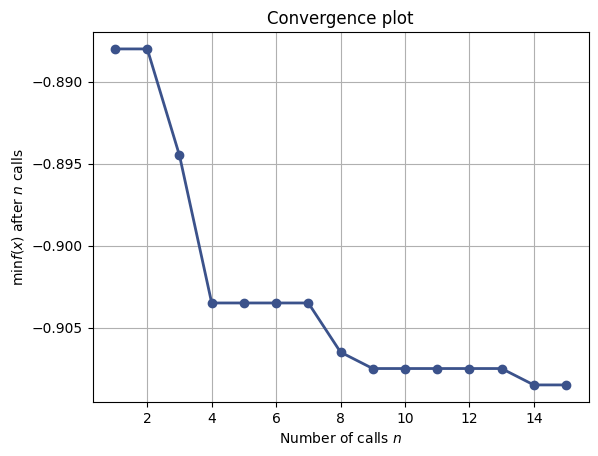

In [111]:
from skopt.plots import plot_convergence 
 
plot_convergence(result)

## rf_hyperopt

In [118]:
import numpy as np 
import pandas as pd 
 
from functools import partial 
 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import model_selection 
 
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope

def optimize(params, x, y): 
    """ 
    The main optimization function.  
    This function takes all the arguments from the search space 
    and training features and targets. It then initializes 
        the models by setting the chosen parameters and runs  
    cross-validation and returns a negative accuracy score 
    :param params: list of params from gp_minimize 
    :param param_names: list of param names. order is important! 
    :param x: training data 
    :param y: labels/targets 
    :return: negative accuracy after 5 folds 
    """ 
 
 
    # initialize model with current parameters 
    model = ensemble.RandomForestClassifier(**params) 
 
    # initialize stratified k-fold 
    kf = model_selection.StratifiedKFold(n_splits=5) 
 
    # initialize accuracy list 
    accuracies = [] 
 
    # loop over all folds 
    for idx in kf.split(X=x, y=y): 
        train_idx, test_idx = idx[0], idx[1] 
        xtrain = x[train_idx] 
        ytrain = y[train_idx] 
 
        xtest = x[test_idx] 
        ytest = y[test_idx] 
 
        # fit model for current fold 
        model.fit(xtrain, ytrain) 
 
        #create predictions 
        preds = model.predict(xtest) 
 
        # calculate and append accuracy 
        fold_accuracy = metrics.accuracy_score( 
            ytest, 
            preds 
        ) 
        accuracies.append(fold_accuracy) 
     
    # return negative accuracy 
    return -1 * np.mean(accuracies)

In [119]:
df = pd.read_csv(r"C:\Users\lia68085\github_ML\ml_learning\handy_price\train.csv") 
 
    # features are all columns without price_range 
    # note that there is no id column in this dataset 
    # here we have training features 
X = df.drop("price_range", axis=1).values 
    # and the targets 
y = df.price_range.values 
 
    # define a parameter space 
    # now we use hyperopt
param_space = { 
        # quniform gives round(uniform(low, high) / q) * q 
        # we want int values for depth and estimators 
        "max_depth": scope.int(hp.quniform("max_depth", 1, 15, 1)), 
        "n_estimators": scope.int( 
            hp.quniform("n_estimators", 100, 1500, 1) 
        ), 
        # choice chooses from a list of values 
        "criterion": hp.choice("criterion", ["gini", "entropy"]), 
        # uniform chooses a value between two values 
        "max_features": hp.uniform("max_features", 0, 1) 
    }

# partial function 
optimization_function = partial( 
        optimize, 
        x=X, 
        y=y 
    )
# initialize trials to keep logging information 
trials = Trials() 
     
    # run hyperopt 
hopt = fmin( 
        fn=optimization_function, 
        space=param_space, 
        algo=tpe.suggest, 
        max_evals=15, 
        trials=trials 
    ) 
print(hopt) 

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 15/15 [05:20<00:00, 21.35s/trial, best loss: -0.906]             
{'criterion': 1, 'max_depth': 11.0, 'max_features': 0.8450252075191047, 'n_estimators': 1017.0}
